# MVAR Simulation for Microbiota and Metabolites

### MVAR Process

The MVAR model extends the traditional VAR model used to fit abundances over time, by incorporating metabolites. The model can be expressed as follows:

$$ X_t = A \cdot X_{t-1} + \epsilon_{X,t} $$
$$ S_t = B \cdot X_{t-1} + \epsilon_{S,t} $$

where:
- $X_t$ is the vector of microbiota abundances at time $t$,
- $S_t$ is the vector of metabolite abundances at time $t$,
- $A$ and $B$ are matrices representing the interactions within microbiota and between microbiota and metabolites, respectively,
- $\epsilon_{X,t}$ and $\epsilon_{S,t}$ are vectors of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

### Objective

The objective of this notebook is to simulate the dynamics between microbiota and metabolites using the MVAR model. Through simulation, we aim to demonstrate how specific interactions can be identified and quantified, providing insights into the causal relationships within these systems.

### Simulation with `VARsim.py` for sVAR Models

The `VARsim.py` script has been adapted to support MVAR simulation, allowing us to specify metabolite interaction matrices and simulate the dynamics of microbiota and metabolites over time. This section demonstrates how to use the script for simulating and visualizing the interactions captured by our MVAR model.


### Example Usage of `VARsim.py` for MVAR Simulation

The implementation of the VAR model in `VARsim.py` allows for detailed simulation of the dynamic interactions between microbiota and their produced metabolites. The script is designed to facilitate straightforward simulation of these complex biological systems. The following code examples provide a guide on how to leverage the `VARsim.py` script to simulate these interactions effectively:


In [1]:
# Importing the libraries
from mimic.model_simulate.sim_VAR import *
from mimic.model_infer.infer_VAR_bayes import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


First, let's first generate synthetic data for microbiota using the sim_VAR class. We will then simulate the sparse interaction with a given matrix

In [2]:
# Simulate a VAR model

simulator = sim_VAR()

We can now use the following parameters to generate the metabolic data:

```json
{
    "coefficientsM": [
        [
            0.0,
            -0.5,
            0.0
        ],
        [
            0.1,
            0.1,
            -0.1
        ],
        [
            -0.2,
            0.1,
            0.3
        ]
    ],
    "initial_valuesM": [
        [
            2
        ],
        [
            0
        ],
        [
            0
        ]
    ]
}

In [3]:
simulator.read_parameters(r'parametersS.json')
simulator.print_parameters()

Model parameters:
Model: VAR
n_obs: 97
coefficients: [[ 0.8 -0.2  0.3]
 [ 0.3  0.5 -1. ]
 [ 0.2 -0.1  0.4]]
initial_values: [[1]
 [2]
 [0]]
noise_stddev: 1.2
output: show
coefficientsM: [[ 0.  -0.5  0. ]
 [ 0.1  0.1 -0.1]
 [-0.2  0.1  0.3]]
initial_valuesM: [[2]
 [0]
 [0]]


Using the following parameters for sVAR simulation: {'n_obs': 97, 'coefficients': array([[ 0.8, -0.2,  0.3],
       [ 0.3,  0.5, -1. ],
       [ 0.2, -0.1,  0.4]]), 'initial_values': array([[1],
       [2],
       [0]]), 'noise_stddev': 1.2, 'output': 'show', 'coefficientsM': array([[ 0. , -0.5,  0. ],
       [ 0.1,  0.1, -0.1],
       [-0.2,  0.1,  0.3]]), 'initial_valuesM': array([[2],
       [0],
       [0]])}


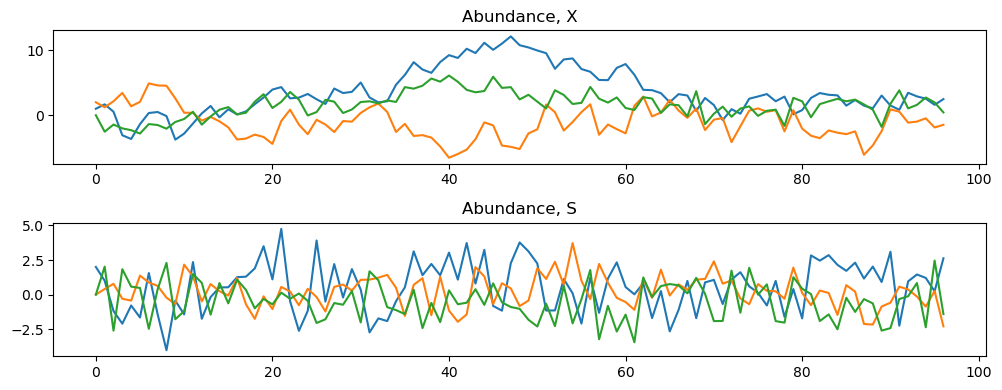

In [4]:
simulator.simulate('MVARsim')

In [5]:
data = simulator.data
print(data)

[[ 1.          2.          0.        ]
 [ 1.67888243  1.2252676  -2.53489962]
 [ 0.54247057  2.15086928 -1.43472325]
 [-3.08516419  3.43902248 -2.02431271]
 [-3.65265336  1.3787089  -2.30187508]
 [-1.36798662  2.07104679 -2.81625345]
 [ 0.34743643  4.90379075 -1.36113525]
 [ 0.49731353  4.59005517 -1.5048774 ]
 [-0.1299054   4.54269798 -2.07258533]
 [-3.75377598  2.59857337 -1.03677919]
 [-2.82613366  0.39200921 -0.57855071]
 [-1.27212655  0.37292025  0.53115113]
 [ 0.28206224 -0.82702417 -1.44786022]
 [ 1.42713494 -0.25383209 -0.18606584]
 [-0.32362096 -0.93819285  0.84875353]
 [ 0.9164963  -1.86354447  1.25358166]
 [ 0.12037861 -3.73445335  0.1265271 ]
 [ 0.5913374  -3.58838759  0.38701363]
 [ 1.69775061 -2.98489917  2.08272883]
 [ 2.72844737 -3.34641458  3.24500643]
 [ 3.95431564 -4.40974306  1.1159384 ]
 [ 4.33131133 -0.88952093  2.06556994]
 [ 2.60176428  0.85203782  3.58181455]
 [ 2.71243744 -1.4415005   2.39317924]
 [ 3.27621435 -2.91764298 -0.03597789]
 [ 2.4620118  -0.70070946

In [6]:
dataM = simulator.dataM
print(dataM)

[[ 2.          0.          0.        ]
 [ 1.00341922  0.40563282  2.0260518 ]
 [-1.18556521  0.78170315 -2.60522073]
 [-2.10191803 -0.29980157  1.83838738]
 [-0.78623067 -0.43431261  0.57768795]
 [-1.654778    1.37329558  0.48142808]
 [ 1.55986739  0.87446025 -2.47254102]
 [-1.42324657  0.63262699  0.38708857]
 [-4.01884806 -0.21974501  2.29262972]
 [-0.43298344 -0.68137117 -1.77936921]
 [-1.43003881  2.16668561 -1.19795553]
 [ 2.35211584  1.31606367  1.48579555]
 [-1.74561953 -0.49299829  0.85009585]
 [-0.1763263   0.76223316 -1.45024971]
 [ 0.51658018  0.24594117  0.83720617]
 [ 0.53158729 -0.069207   -0.6300927 ]
 [ 1.26281377  1.20194008  1.07573743]
 [ 1.29628765 -0.69481864  0.34460184]
 [ 1.8922214  -1.75203589 -0.98967628]
 [ 3.49868046 -0.12267998 -0.31304827]
 [ 1.10112612 -1.04535776 -0.70404977]
 [ 4.74974767  0.55401215  0.14279217]
 [-0.47670879  0.2227066  -0.30188516]
 [-2.61664425 -0.76860705  0.08098164]
 [-1.17487543  0.41788226 -0.44856368]
 [ 3.91115294 -0.17272612

In [7]:
infer = infer_VAR(data=data, dataS=dataM)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [X0h, S0h, Ah, Bh, sigma]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 30 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.742  0.043   0.663    0.824      0.001    0.001    3603.0   
Ah[0, 1] -0.089  0.058  -0.197    0.021      0.001    0.001    4886.0   
Ah[0, 2]  0.472  0.084   0.312    0.623      0.001    0.001    3575.0   
Ah[1, 0]  0.235  0.043   0.154    0.314      0.001    0.001    2911.0   
Ah[1, 1]  0.585  0.057   0.483    0.694      0.001    0.001    4646.0   
Ah[1, 2] -0.807  0.081  -0.962   -0.660      0.001    0.001    3020.0   
Ah[2, 0]  0.239  0.044   0.159    0.321      0.001    0.001    2226.0   
Ah[2, 1] -0.094  0.058  -0.204    0.014      0.001    0.001    2089.0   
Ah[2, 2]  0.351  0.080   0.213    0.514      0.002    0.001    1988.0   
Bh[0, 0] -0.057  0.305  -0.656    0.495      0.007    0.005    1883.0   
Bh[0, 1] -0.572  0.166  -0.877   -0.243      0.004    0.003    2224.0   
Bh[0, 2]  0.018  0.781  -1.382    1.572      0.018    0.013    1836.0   
Bh[1, 0] -0.001  0.330  -0.585    0.670      0.009 

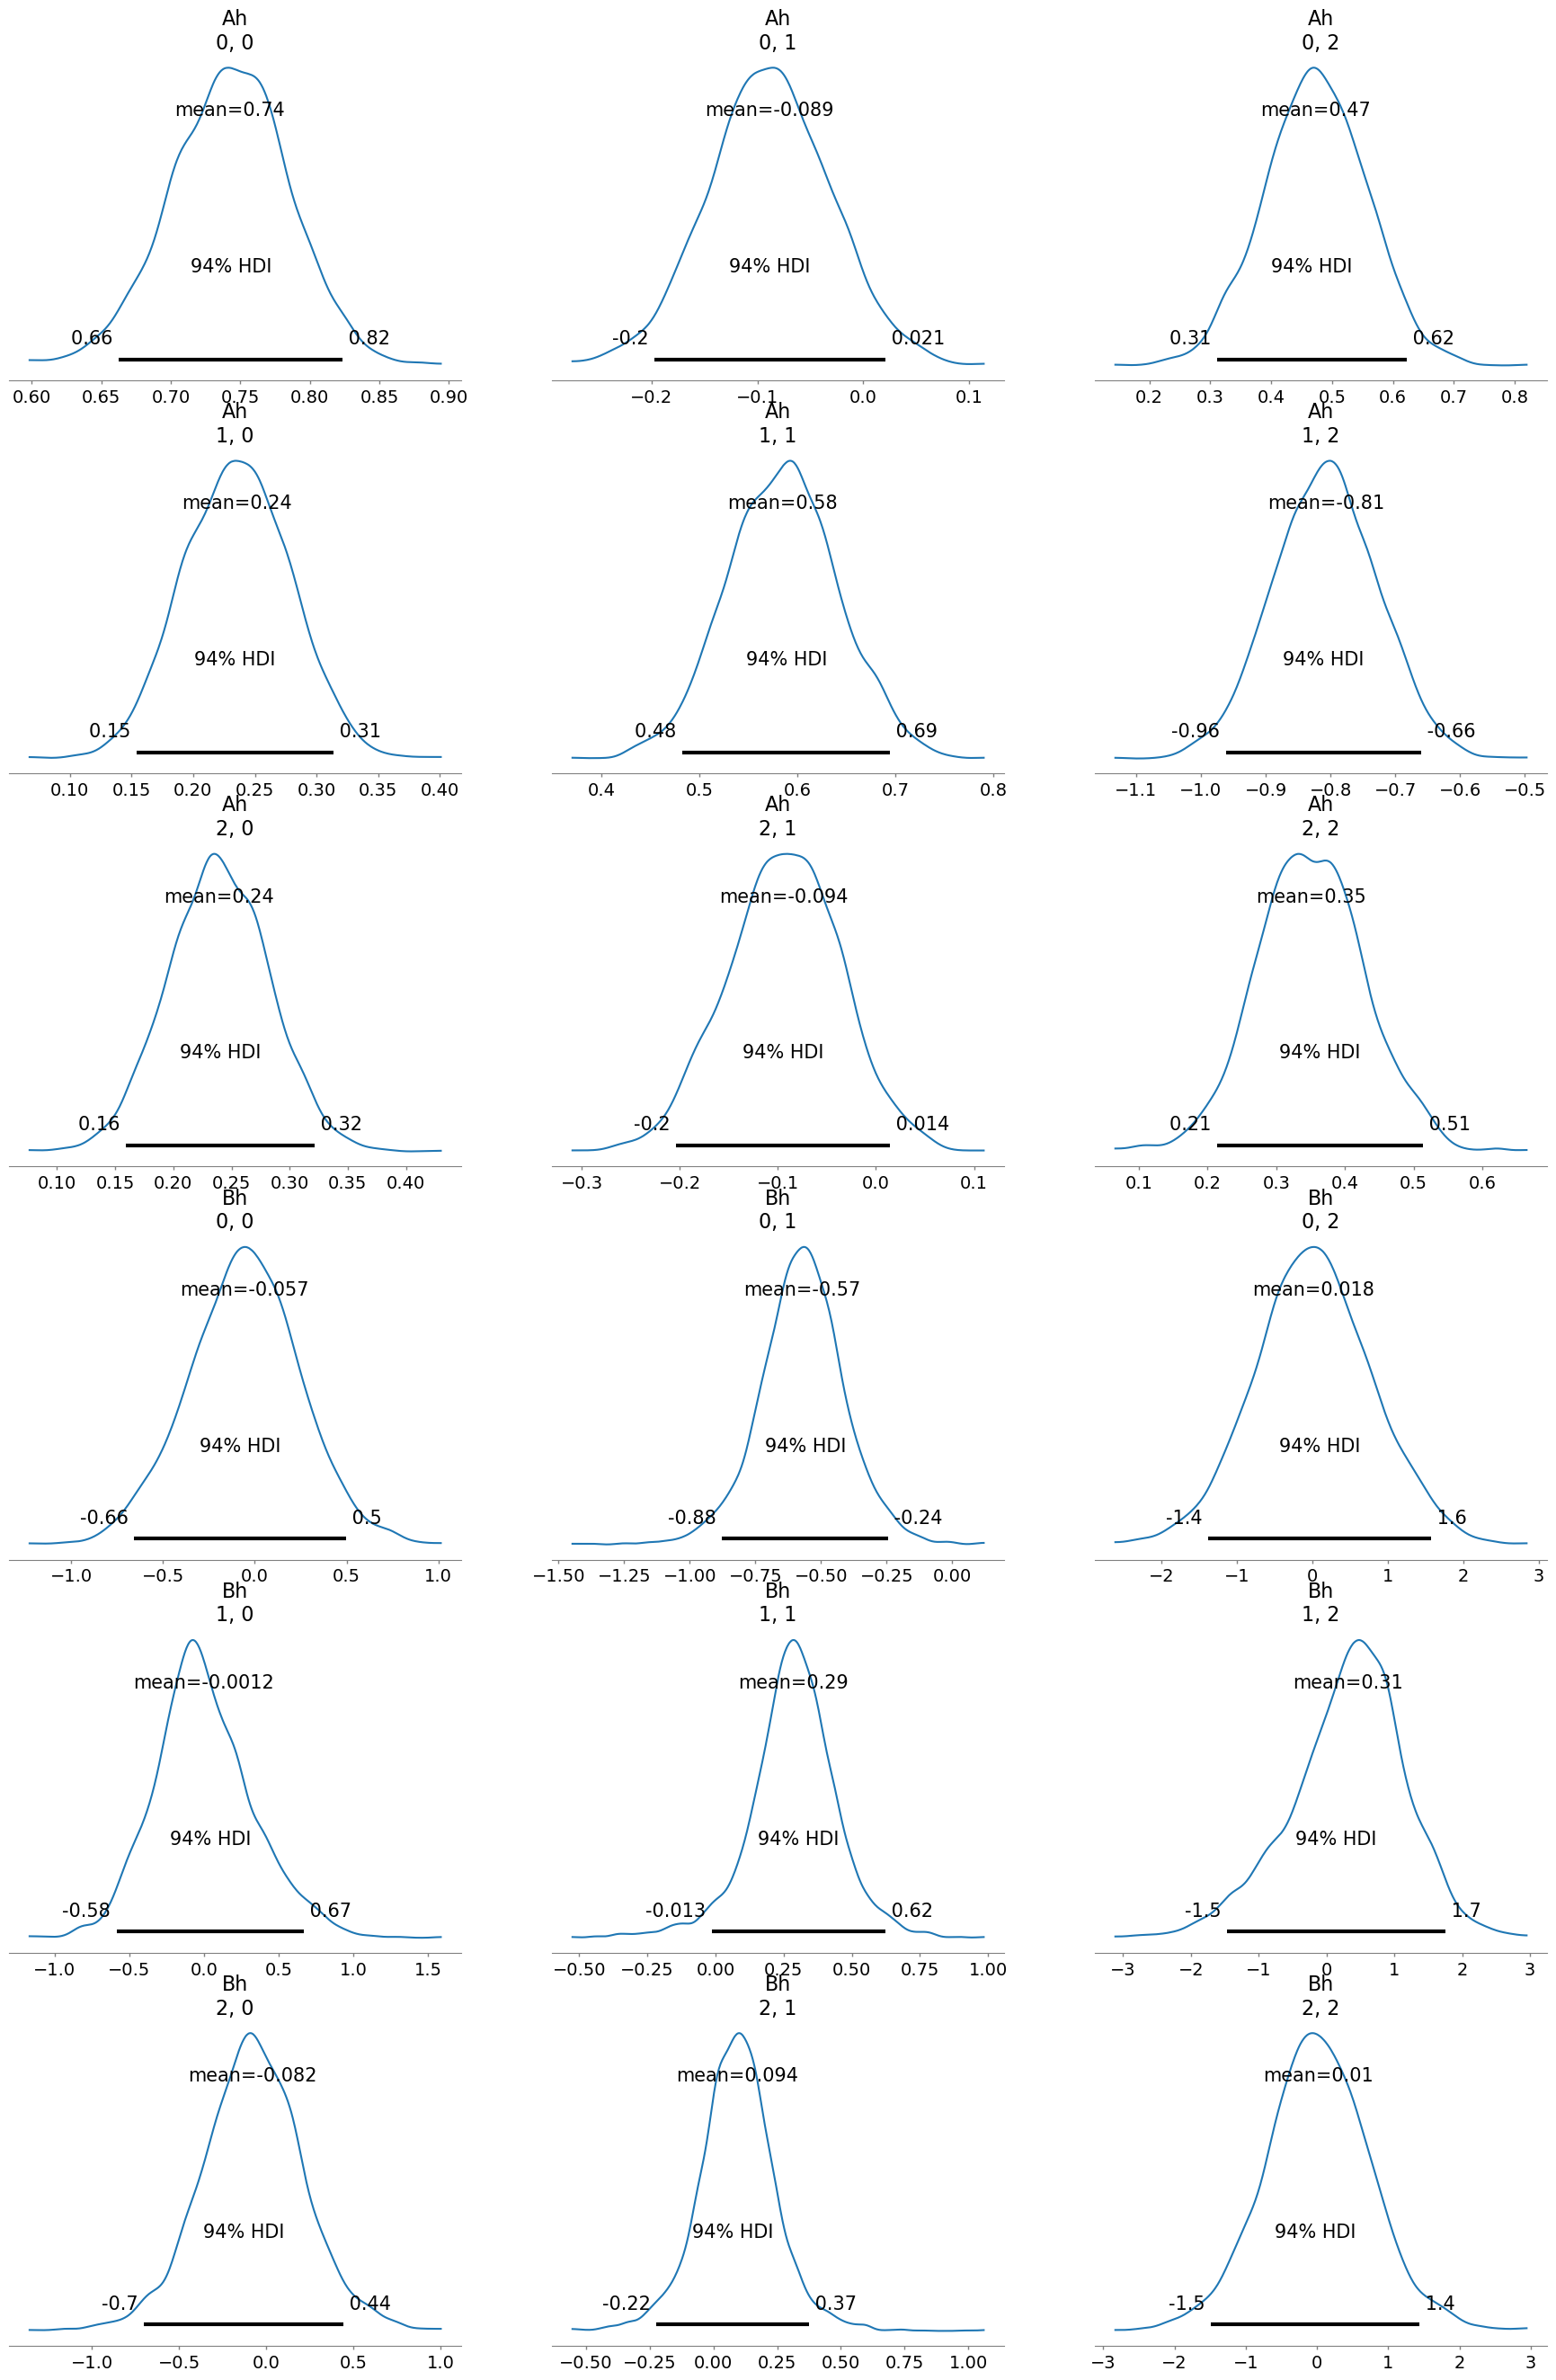

In [8]:
infer.run_inference_xs()

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.742  0.043   0.663    0.824      0.001    0.001    3603.0   
Ah[0, 1] -0.089  0.058  -0.197    0.021      0.001    0.001    4886.0   
Ah[0, 2]  0.472  0.084   0.312    0.623      0.001    0.001    3575.0   
Ah[1, 0]  0.235  0.043   0.154    0.314      0.001    0.001    2911.0   
Ah[1, 1]  0.585  0.057   0.483    0.694      0.001    0.001    4646.0   
Ah[1, 2] -0.807  0.081  -0.962   -0.660      0.001    0.001    3020.0   
Ah[2, 0]  0.239  0.044   0.159    0.321      0.001    0.001    2226.0   
Ah[2, 1] -0.094  0.058  -0.204    0.014      0.001    0.001    2089.0   
Ah[2, 2]  0.351  0.080   0.213    0.514      0.002    0.001    1988.0   
Bh[0, 0] -0.057  0.305  -0.656    0.495      0.007    0.005    1883.0   
Bh[0, 1] -0.572  0.166  -0.877   -0.243      0.004    0.003    2224.0   
Bh[0, 2]  0.018  0.781  -1.382    1.572      0.018    0.013    1836.0   
Bh[1, 0] -0.001  0.330  -0.585    0.670      0.009 

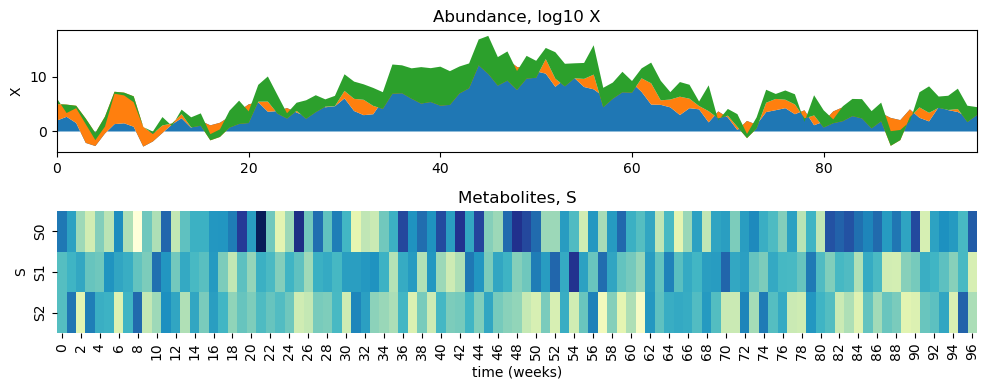

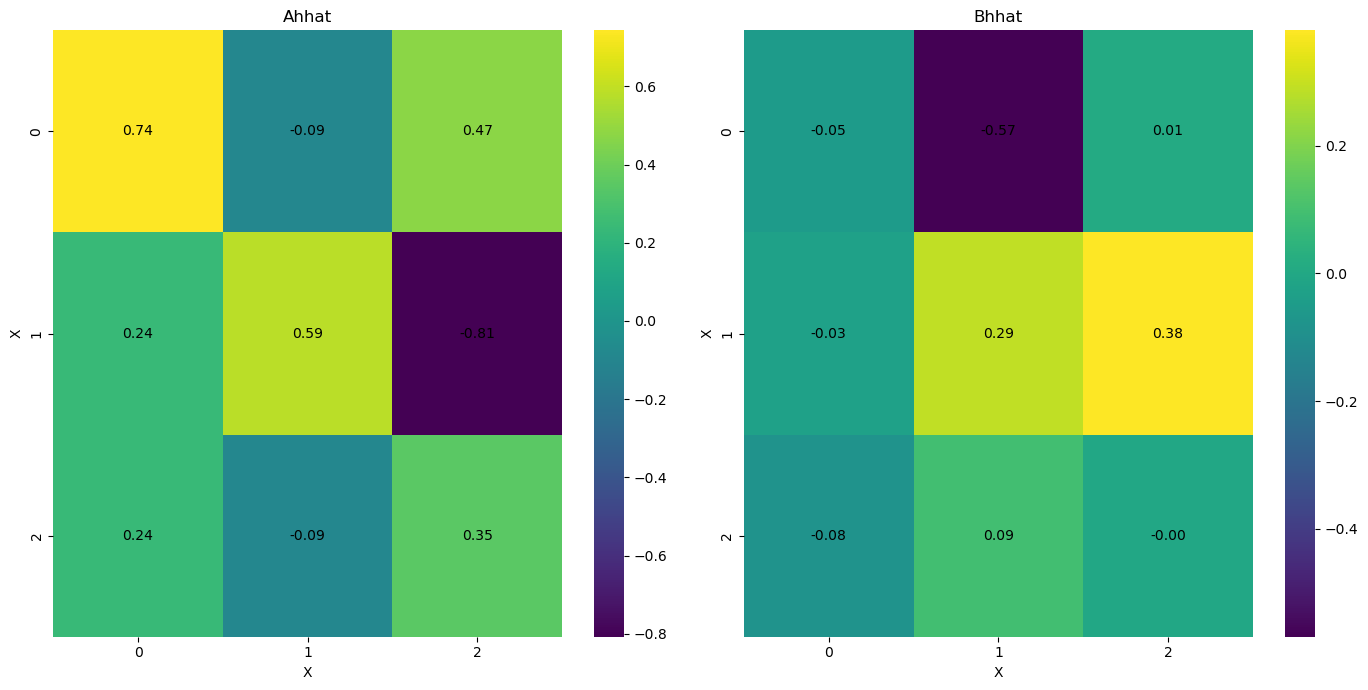

In [9]:
infer.posterior_analysis()

In [10]:
# we can also plot the results with the original paremetr values that we used to simulate the data

A = np.array([[0.8, -0.2,  0.3],
              [0.3,  0.5, -1.],
              [0.2, -0.1,  0.4]])

B = np.array([[0.,  -0.5,  0.],
              [0.1, 0.1, -0.1],
              [-0.2, 0.1, 0.3]])

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.742  0.043   0.663    0.824      0.001    0.001    3603.0   
Ah[0, 1] -0.089  0.058  -0.197    0.021      0.001    0.001    4886.0   
Ah[0, 2]  0.472  0.084   0.312    0.623      0.001    0.001    3575.0   
Ah[1, 0]  0.235  0.043   0.154    0.314      0.001    0.001    2911.0   
Ah[1, 1]  0.585  0.057   0.483    0.694      0.001    0.001    4646.0   
Ah[1, 2] -0.807  0.081  -0.962   -0.660      0.001    0.001    3020.0   
Ah[2, 0]  0.239  0.044   0.159    0.321      0.001    0.001    2226.0   
Ah[2, 1] -0.094  0.058  -0.204    0.014      0.001    0.001    2089.0   
Ah[2, 2]  0.351  0.080   0.213    0.514      0.002    0.001    1988.0   
Bh[0, 0] -0.057  0.305  -0.656    0.495      0.007    0.005    1883.0   
Bh[0, 1] -0.572  0.166  -0.877   -0.243      0.004    0.003    2224.0   
Bh[0, 2]  0.018  0.781  -1.382    1.572      0.018    0.013    1836.0   
Bh[1, 0] -0.001  0.330  -0.585    0.670      0.009 

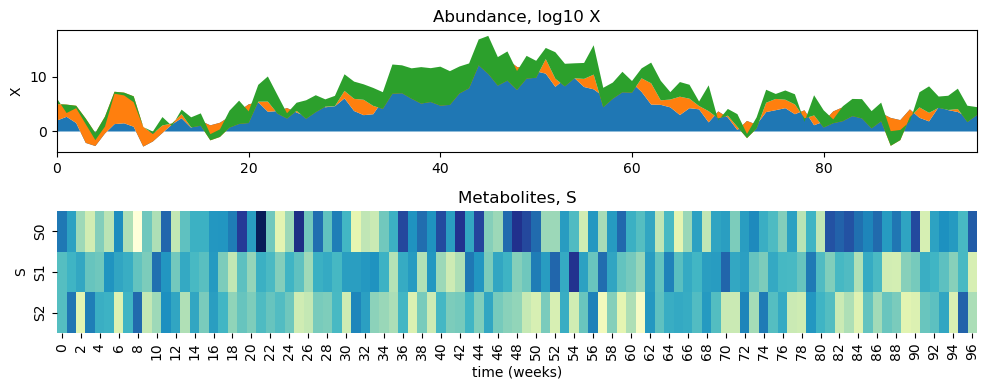

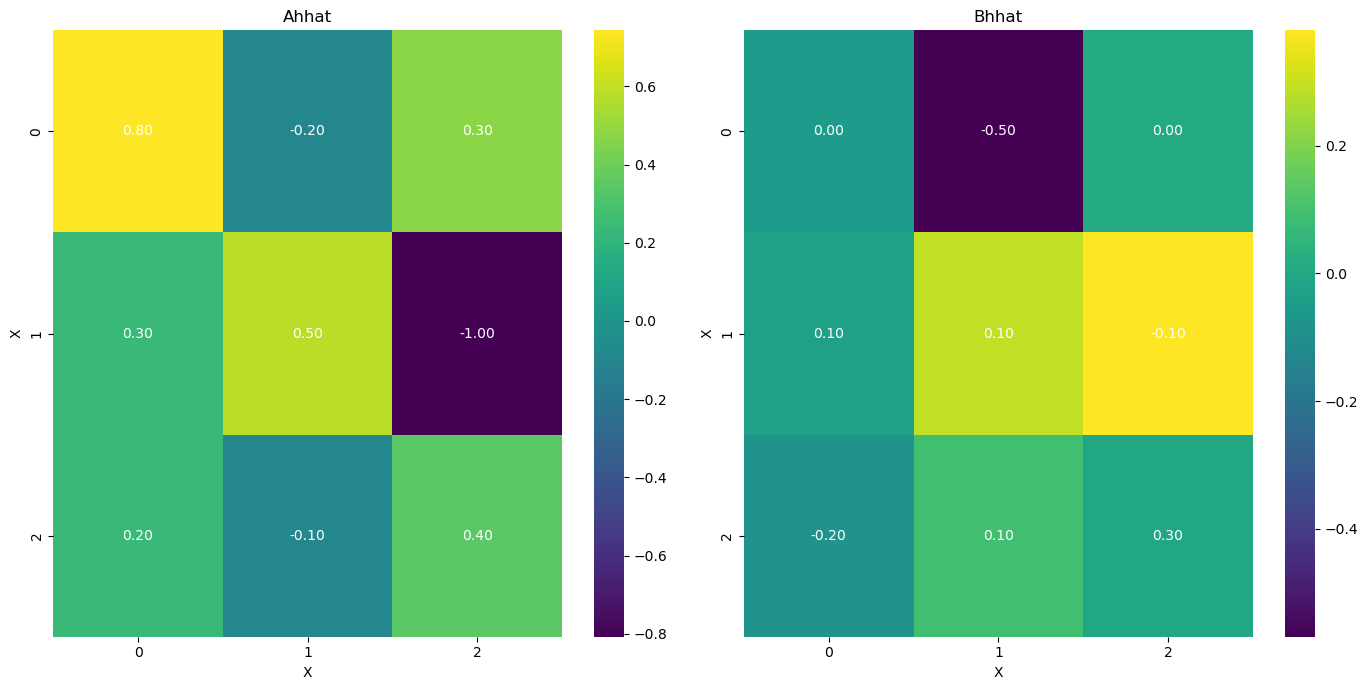

In [11]:
infer.posterior_analysis(A, B)

In [12]:
infer2 = infer_VAR(data=data, dataS=dataM)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c2_A, tau_A, lam_A, Ah, c2_B, tau_B, lam_B, Bh, sigma]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 71 seconds.
There were 2455 divergences after tuning. Increase `target_accept` or reparameterize.


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.751  0.032   0.692    0.812      0.001    0.000    4042.0   
Ah[0, 1] -0.085  0.046  -0.169    0.004      0.001    0.001    1545.0   
Ah[0, 2]  0.459  0.066   0.331    0.576      0.002    0.002    1495.0   
Ah[1, 0]  0.241  0.031   0.182    0.300      0.001    0.000    3659.0   
Ah[1, 1]  0.598  0.041   0.522    0.676      0.001    0.000    4004.0   
Ah[1, 2] -0.807  0.059  -0.918   -0.696      0.001    0.001    3268.0   
Ah[2, 0]  0.233  0.033   0.172    0.295      0.000    0.000    6474.0   
Ah[2, 1] -0.067  0.047  -0.154    0.020      0.001    0.001    2642.0   
Ah[2, 2]  0.385  0.068   0.253    0.505      0.001    0.001    2402.0   
Bh[0, 0] -0.025  0.055  -0.133    0.068      0.001    0.001    2462.0   
Bh[0, 1] -0.547  0.072  -0.688   -0.415      0.002    0.001    2273.0   
Bh[0, 2] -0.022  0.134  -0.306    0.204      0.003    0.002    3124.0   
Bh[1, 0]  0.054  0.084  -0.105    0.185      0.002 

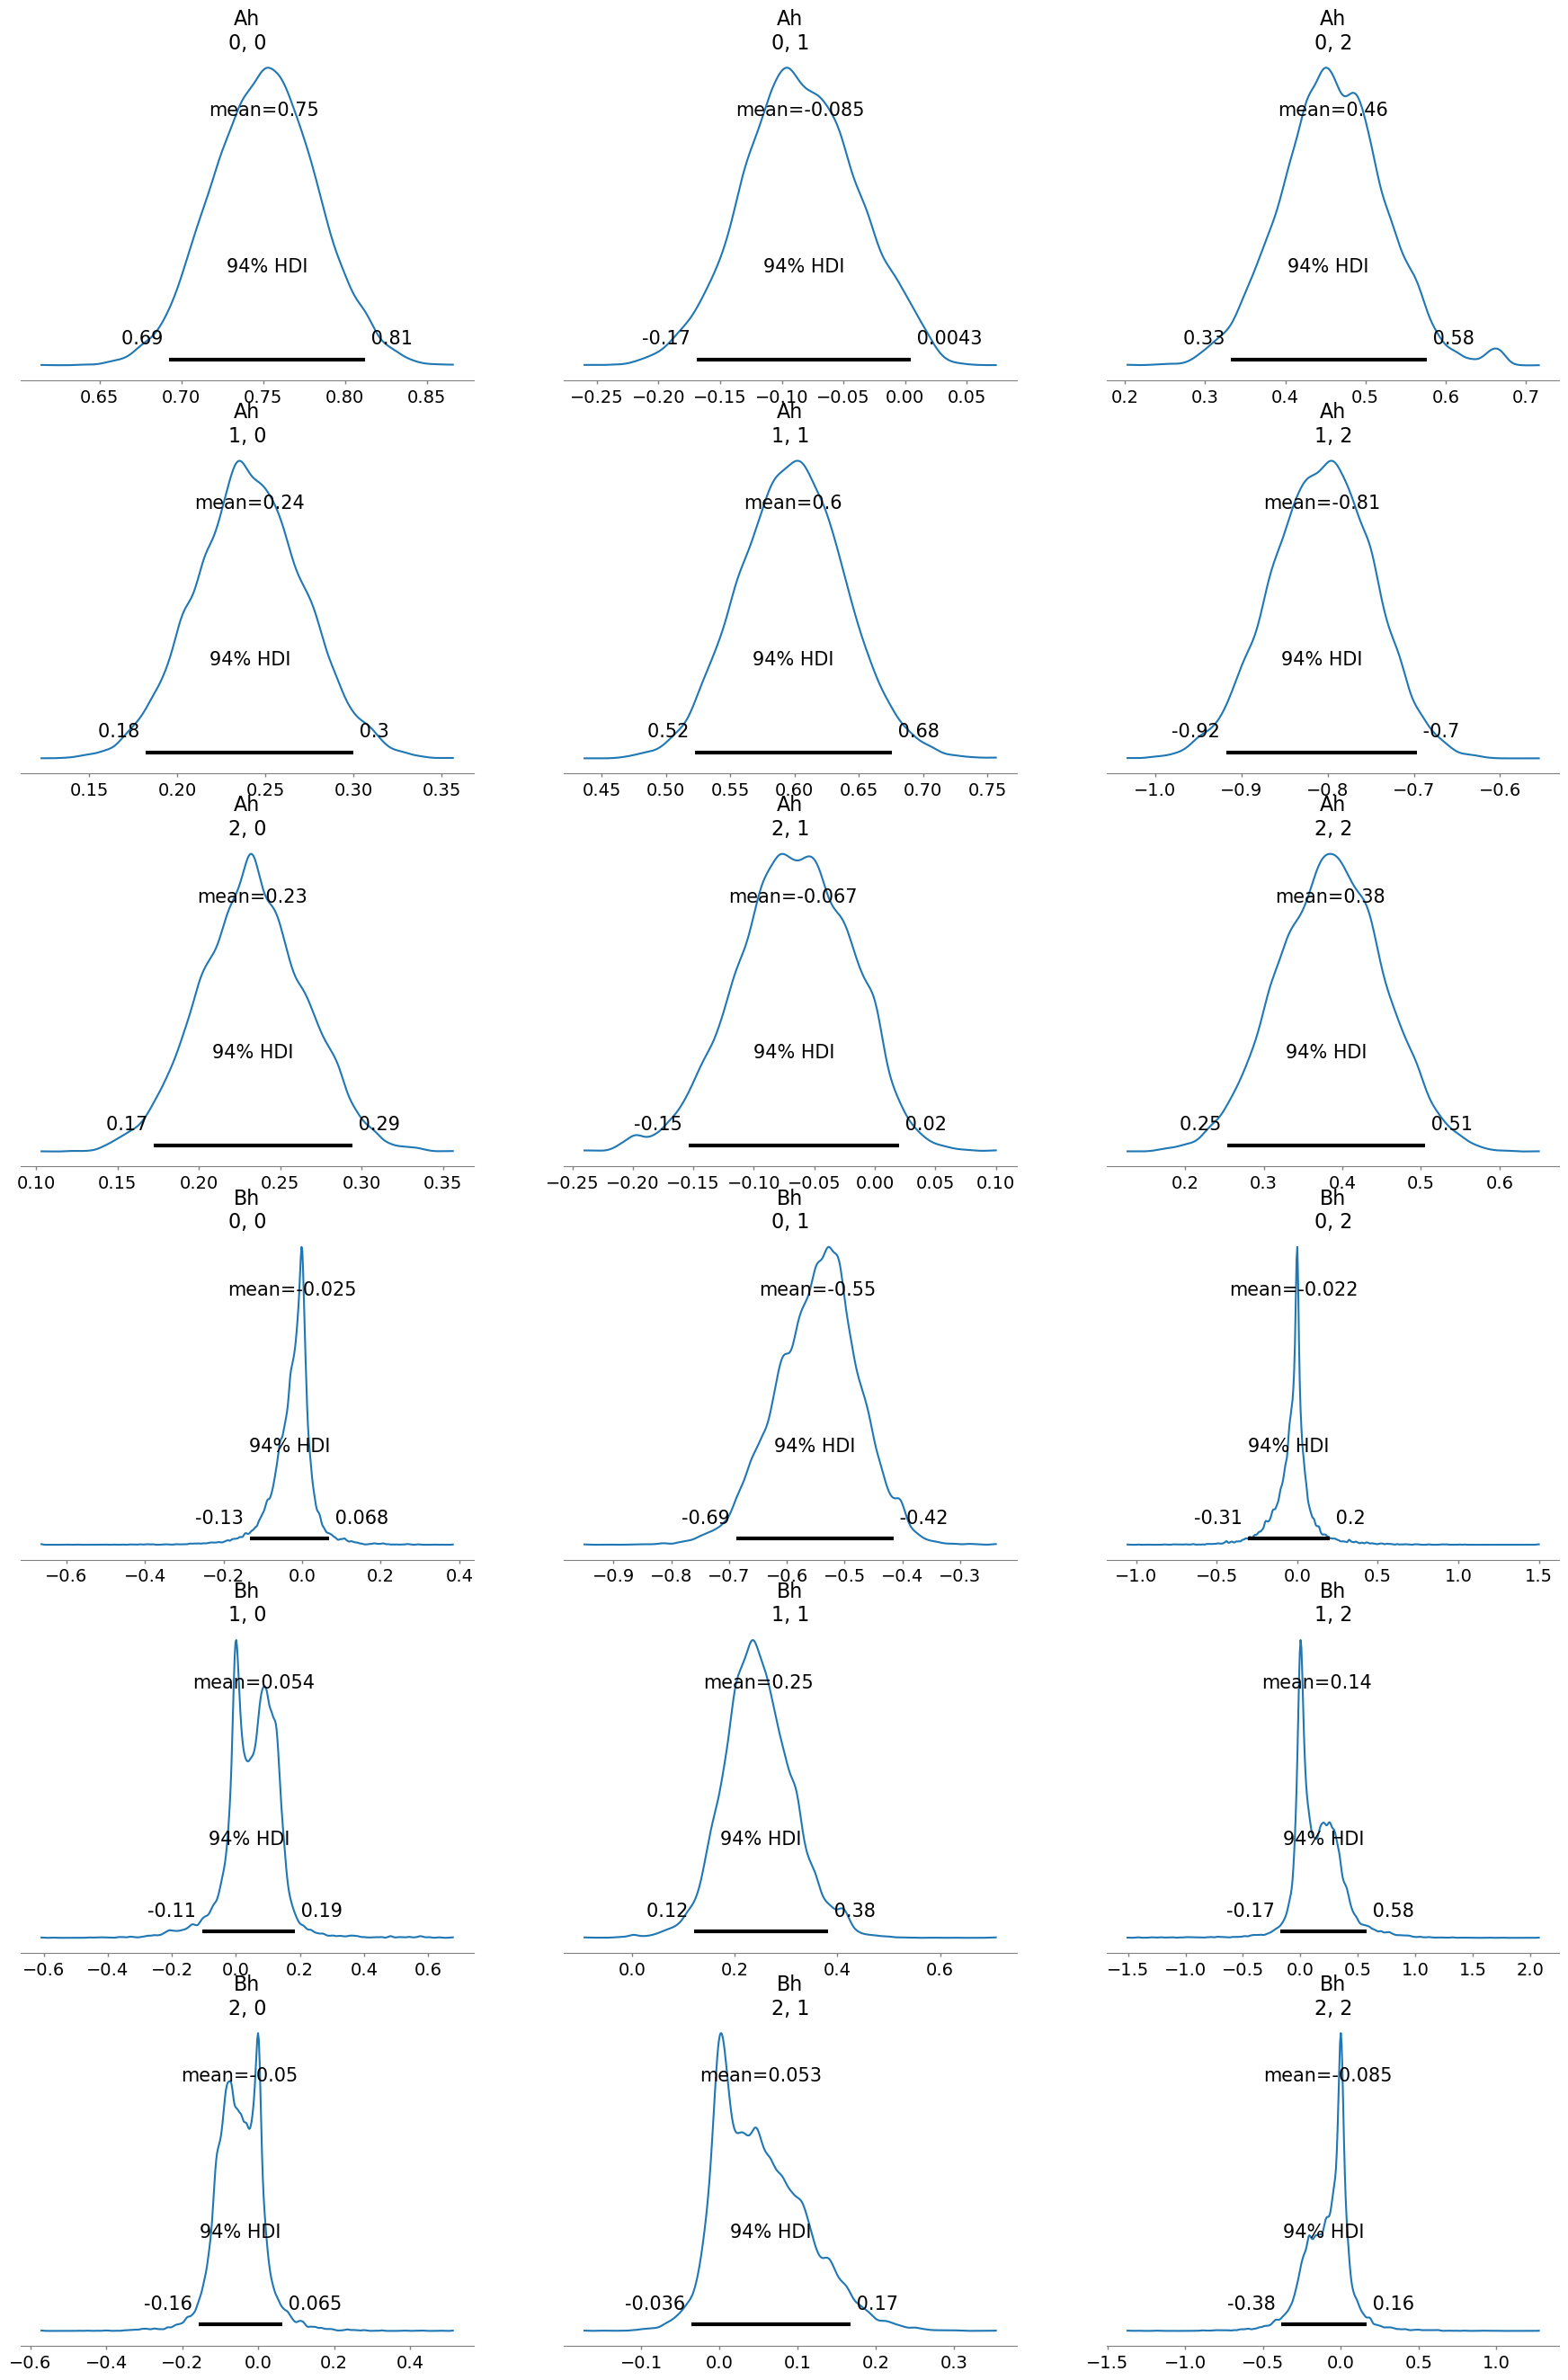

In [13]:
infer2.run_inference_large_xs()

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Ah[0, 0]  0.751  0.032   0.692    0.812      0.001    0.000    4042.0   
Ah[0, 1] -0.085  0.046  -0.169    0.004      0.001    0.001    1545.0   
Ah[0, 2]  0.459  0.066   0.331    0.576      0.002    0.002    1495.0   
Ah[1, 0]  0.241  0.031   0.182    0.300      0.001    0.000    3659.0   
Ah[1, 1]  0.598  0.041   0.522    0.676      0.001    0.000    4004.0   
Ah[1, 2] -0.807  0.059  -0.918   -0.696      0.001    0.001    3268.0   
Ah[2, 0]  0.233  0.033   0.172    0.295      0.000    0.000    6474.0   
Ah[2, 1] -0.067  0.047  -0.154    0.020      0.001    0.001    2642.0   
Ah[2, 2]  0.385  0.068   0.253    0.505      0.001    0.001    2402.0   
Bh[0, 0] -0.025  0.055  -0.133    0.068      0.001    0.001    2462.0   
Bh[0, 1] -0.547  0.072  -0.688   -0.415      0.002    0.001    2273.0   
Bh[0, 2] -0.022  0.134  -0.306    0.204      0.003    0.002    3124.0   
Bh[1, 0]  0.054  0.084  -0.105    0.185      0.002 

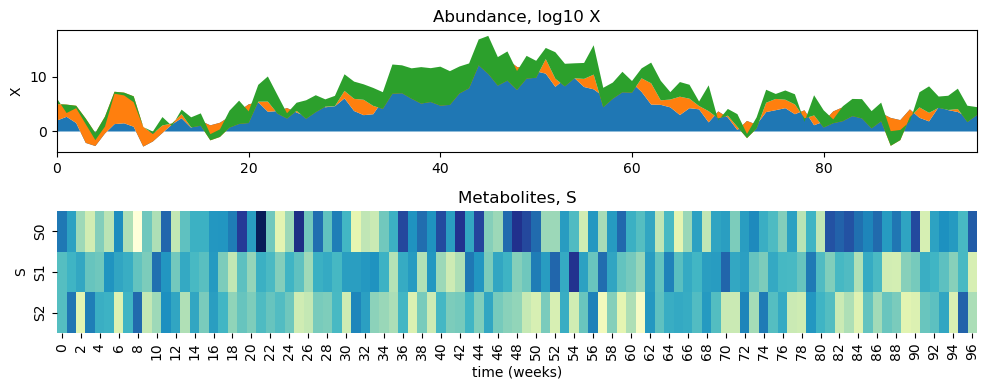

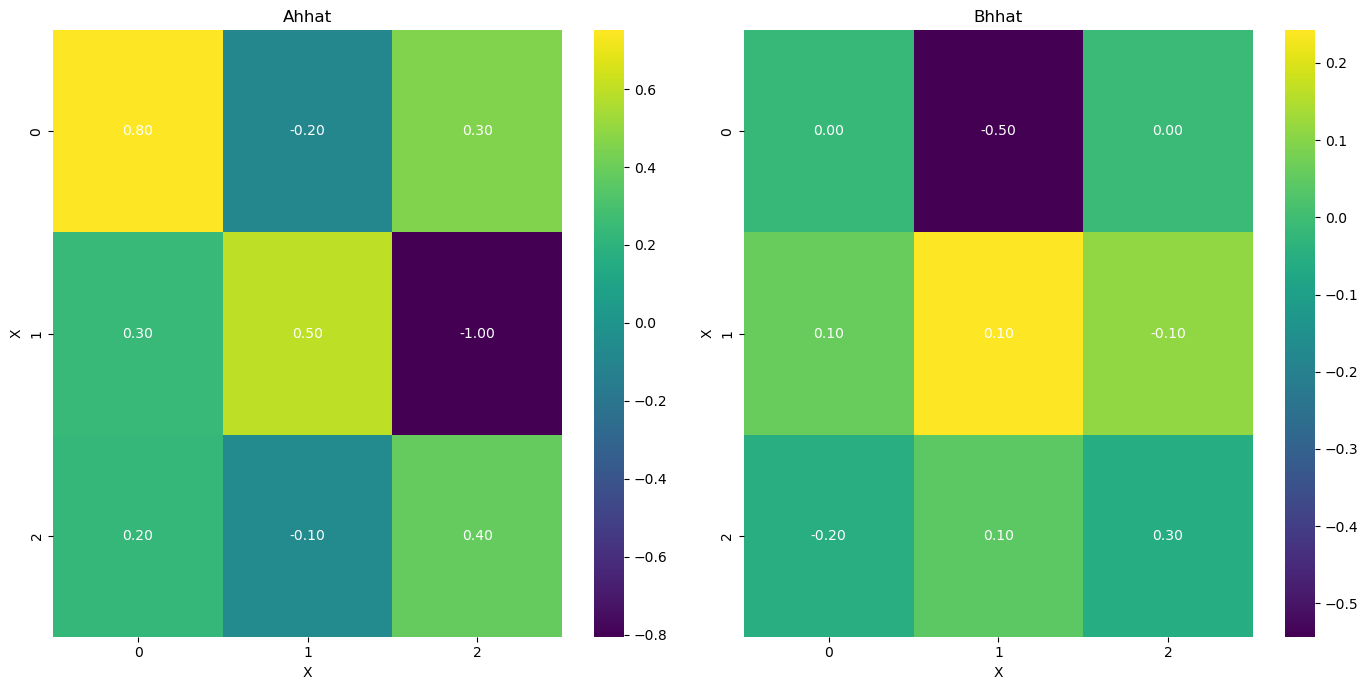

In [14]:
infer2.posterior_analysis(A, B)